River Wang

Process the datasets and generate plots that trace the monthly mean anxiety scores, as determined by LIWC, for each of the subreddits.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # matplolib pyplot module as "plt"

In [68]:
def compute_score(subreddit, type):
    '''
    Compute the monthly mean anxiety scores for the posts or comments from a given sureddit.

    Inputs:
      subreddit (str): name of the subreddit
      type (str): 'posts' or 'comments'
    
    Ouput: a dataframe with the mean anxiety scores by month
    '''
    # import the datasets
    df_time = pd.read_csv("../data_processing/Raam_database_csvs/{}_{}.csv".format(subreddit, type))
    df_liwc = pd.read_csv("../data_processing/Raam_database_csvs/{}_{}_liwc.csv".format(subreddit, type))

    # merge the datasets 
    if type == 'posts':
        df_time = df_time.drop(columns=['post_title', 'post_body'])
    elif type == "comments":
        df_time = df_time.drop(columns=['comment_body'])
    df_liwc = df_liwc.drop(columns=['post_id'])
    if 'comment_id' in df_liwc.columns:
        df_liwc = df_liwc.drop(columns=['comment_id'])
    df_merged = df_liwc.join(df_time, how='inner')

    # extract year and month
    if type == 'posts':
        df_merged['datetime'] = pd.to_datetime(df_merged['timestamp'])
    elif type == 'comments':
        df_merged['datetime'] = pd.to_datetime(df_merged['comment_timestamp'])
    df_merged['Year'] = df_merged['datetime'].dt.year
    df_merged['Month'] = df_merged['datetime'].dt.month

    # group by year and month and calcualte the mean score
    df_score = df_merged.groupby(['Year', 'Month'])['emo_anx'].mean().reset_index()
    df_score = df_score[df_score['Year'] != 2018].reset_index(drop=True)
    
    return df_score

In [69]:
def get_mean_score(posts_score, comments_score):
    '''
    Get the monthly mean anxiety scores across the posts and comments from a given sureddit.

    Inputs:
      post_score (dataframe): dataframe with monthly scores for posts
      comment_score (dataframe): dataframe with monthly scores for comments
    
    Ouput: a dataframe with monthly mean scores
    '''
    # merge the dataframes on year and month
    df_merged = pd.merge(posts_score, comments_score, on=['Year', 'Month'], how='inner', suffixes=('_post', '_comment'))

    # calculate the mean score
    df_merged['emo_anx_mean'] = df_merged[['emo_anx_post', 'emo_anx_comment']].mean(axis=1)

    # add a date column for plotting
    df_merged['Date'] = pd.to_datetime(df_merged[['Year', 'Month']].assign(day=1))

    return df_merged

In [70]:
def plot_mean_scores(subreddit):
    '''
    Plot the monthly mean anxiety scores for a given subreddit.

    Inputs:
      mean_scores (dataframe): a dataframe with monthly mean scores
      subreddit (str): name of the subreddit
    '''
    mean_scores = get_mean_score(compute_score(subreddit, 'posts'), compute_score(subreddit, 'comments'))

    # generate the plot
    plt.figure(figsize=(10, 5))
    plt.plot(mean_scores['Date'], mean_scores['emo_anx_mean'], marker='o', linestyle='-', color='b', label='Score')
    
    # format the plot
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.title('LIWC Mean Anxiety Scores by Month for {}'.format(subreddit))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

In [71]:
# get mean anxiety scores across all months for health anxiety
df_scores = get_mean_score(compute_score('health_anxiety', 'posts'), compute_score('health_anxiety', 'comments'))
df_scores['emo_anx_mean'].mean()

1.9797919580219179

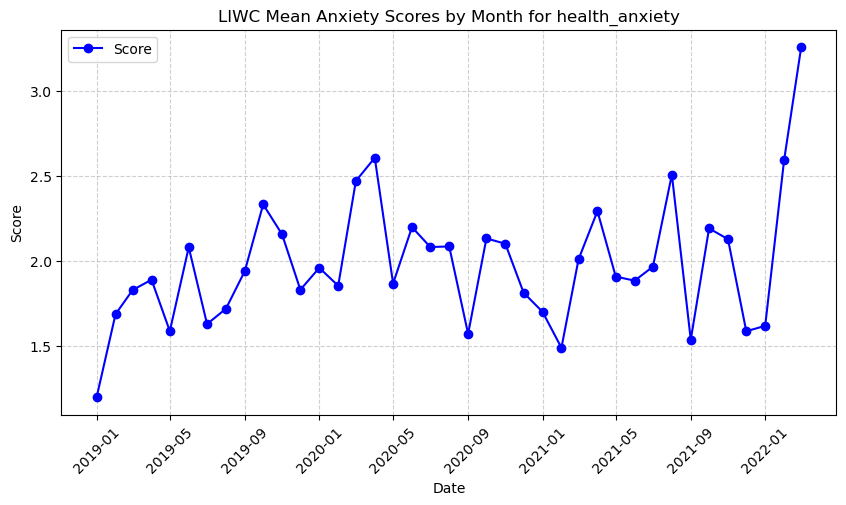

In [62]:
# generate a plot for the health anxiety subreddit
plot_mean_scores('health_anxiety')

In [72]:
# get mean anxiety scores across all months for nursing
df_scores = get_mean_score(compute_score('nursing', 'posts'), compute_score('nursing', 'comments'))
df_scores['emo_anx_mean'].mean()

0.22209551199183838

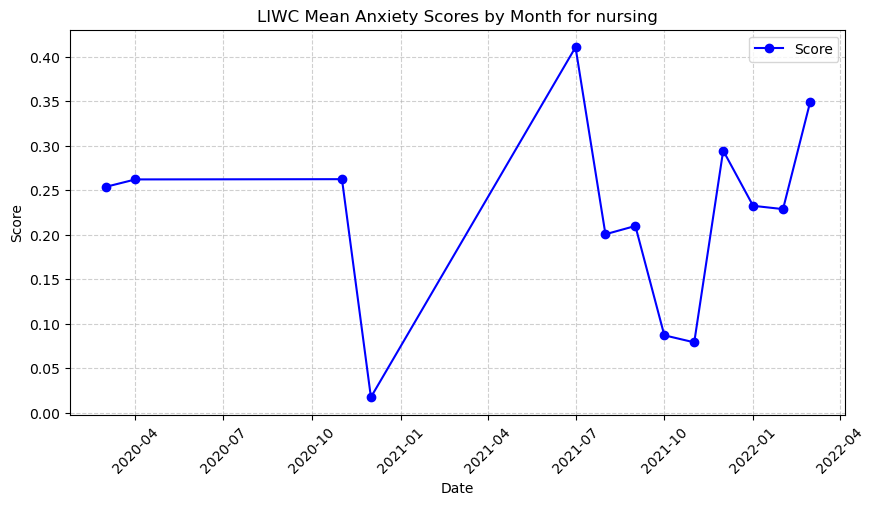

In [73]:
# generate a plot for the nursing subreddit
plot_mean_scores('nursing')

In [74]:
# get mean anxiety scores across all months for teaching
df_scores = get_mean_score(compute_score('teaching', 'posts'), compute_score('teaching', 'comments'))
df_scores['emo_anx_mean'].mean()

0.11179689033800871

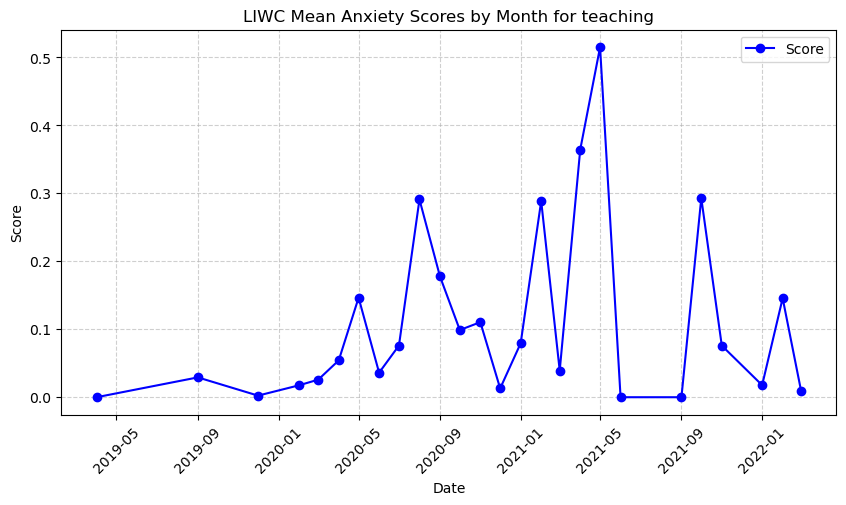

In [75]:
# generate a plot for the teaching subreddit
plot_mean_scores('teaching')